# Análise exploratória de dados com Python

**Primeiros passos**

### Habilidades em Python:
- Iteradores;
- Condicionais;
- Funções.
 
### Habilidades em Estatistica:
- As diferentes formas de centralidade

### Habilidade de Negócios:
- Pensando no problema a ser respondido
---> Homens ganham mais do que mulheres nesse dataset?


# O que é análise exploratória de dados?

<br>
<img src="img/analise_dados.png">
<br>


*fonte: Wikipedia*

Em estatística, a **análise exploratória de dados (AED)** é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses. A análise exploratória de dados foi promovida pelo estatístico norte-americano John Tukey, que incentivava os estatísticos a explorar os dados e possivelmente formular hipóteses que poderiam levar a novas coletas de dados e experimentos. A **AED** é diferente da análise inicial de dados (AID), que se concentra mais estreitamente em verificar os pressupostos exigidos para ajuste de modelos e teste de hipóteses, além de manusear valores faltantes e fazer transformações de variáveis conforme necessário. A análise exploratória de dados abrange a AID.

A análise exploratória de dados emprega grande variedade de técnicas gráficas e quantitativas, visando maximizar a obtenção de informações ocultas na sua estrutura, descobrir variáveis importantes em suas tendências, detectar comportamentos anômalos do fenômeno, testar se são válidas as hipóteses assumidas, escolher modelos e determinar o número ótimo de variáveis.

Os softwares atualmente disponíveis possibilitam que esta técnica se constitua em uma ferramenta para descobrir quais tendências, relações e padrões podem estar ocultos em uma coleção de dados analisados. Seguindo as diretrizes propostas por Tukey, os investigadores deveriam iniciar sua análise pelo exame dos dados disponíveis e depois decidir qual técnica aplicar para resolver o problema. 

### Etapas

Para realizar uma AED recomenda-se seguir as seguintes etapas:

1. Encontrar, acessar e abrir os dados na interface de trabalho (Python);

2. Identificar as informações básicas dos dados com por exemplo conhecer as colunas, missing values, outliers, medidas de centralidade (média, mediana, moda) e dispersão (desvio padrão, variância);

3. Reconhecimento dos tipos de variáveis (figura 1) e como tratar cada uma delas;

4. Análise gráfica para verificação do comportamento das variáveis (linearidade, normalidade);

5. Descrição da relação entre as variávies contidas nos dados (correlações).

#### Figura 1: tipos de variáveis em estatística descritiva

<img src="img/tipos_de_variaveis.png">


# Trabalhando os arquivos com Python

### Abrindo o arquivo e acessando os dados

In [37]:
import csv

with open(r'data/data.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
     
    for i, line in enumerate(data):
        if i < 100:
            print(line)
            
    print(i)

['', 'id', 'idade', 'sexo', 'anos_estudo', 'cor/raca', 'salario', 'estado_civil', 'regiao']
['0', '11001901101.0', '53', 'homem', '5.0', 'Parda', '63600.0', '1.0', 'norte']
['1', '11001901102.0', '49', 'mulher', '8.0', 'Amarela', '', '1.0', 'norte']
['2', '11001901103.0', '22', 'mulher', '11.0', 'Indigena', '4352.400390625', '0.0', 'nordeste']
['3', '11001903101.0', '55', 'homem', '15.0', 'Amarela', '96600.0', '1.0', 'norte']
['4', '11001903102.0', '56', 'mulher', '15.0', 'Amarela', '157800.0', '1.0', 'norte']
['5', '11001903103.0', '30', 'mulher', '15.0', 'Amarela', '88550.0', '0.0', 'nordeste']
['6', '11001904101.0', '52', 'mulher', '5.0', 'Branca', '6734.400390625', '0.0', 'norte']
['7', '11001904104.0', '29', 'homem', '5.0', 'Parda', '14875.20068359375', '0.0', 'norte']
['8', '11001904105.0', '29', 'mulher', '11.0', 'Parda', '6734.400390625', '0.0', 'norte']
['9', '11001905101.0', '46', 'mulher', '15.0', 'Branca', '54300.0', '1.0', 'norte']
['10', '11001905102.0', '52', 'homem', '1

In [38]:
type(data)

_csv.reader

In [3]:
import pandas as pd

df = pd.read_csv("data/data.csv") 
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


# Medidas de Centralidade

### Média

<br>
<img src="img/media.png">
<br>

*fonte: Wikipedia*

Em estatística, média é definida como o valor que mostra para onde se concentram os dados de uma distribuição como o ponto de equilíbrio das frequências em um histograma. Média também é interpretada como um valor significativo de uma lista de números. Os valores de uma lista de números podem ser representados por meio da escolha aleatória de um número. Se todos os números forem iguais, o número escolhido aleatoriamente será a média. Então, a média pode ser calculada por meio da combinação dos números de maneira específica e da geração de um valor significativo. Entretanto, a palavra média é usualmente usada em métodos mais sofisticados como média aritmética, mediana, moda, entre outros.

Seguindo uma definição mais informal de "média", pode-se assumir que no campo da estatística, dados possuem posições. Por exemplo, cada valor dos lançamentos de um dado possui sua posição em uma planilha eletrônica. Em estatística, média é uma medida de posição que indica um valor uniforme dos dados. Por exemplo, o conjunto x = { 2 , 1 , 6 , 5 , 10 } possui média aritmética 4,8. Embora 4,8 seja o valor médio, ele não é o valor central definido pela mediana.

A **média** é calculada por:

$$ \overline x = \frac{1}{n} \sum_i x_i $$

Por exemplo, para a mostra 8, 5, 3, -1, e -5, a média é:

In [1]:
numbers = [8,5,3,-1,-5]

somatorio = 0
for number in numbers:
    somatorio += number
    print(f'Somando {number} + {somatorio-number} = {somatorio}')
    
media = somatorio/len(numbers)
print('\nmédia:',media)

Somando 8 + 0 = 8
Somando 5 + 8 = 13
Somando 3 + 13 = 16
Somando -1 + 16 = 15
Somando -5 + 15 = 10

média: 2.0


### Calculando a média para variável do salário

In [59]:
media_salario = df['salario'].sum() / df.shape[0]
media_salario

16184.410275956378

### Calculando a média para a variável da idade

In [60]:
media_idade = df['idade'].sum() / df.shape[0]
media_idade

37.6348126974575

### Calculando a média para a variável anos de estudo

In [15]:
media_anos_estudo = df['anos_estudo'].sum() / df.shape[0]
media_anos_estudo

8.629351587182187

### Mediana

<br>
<img src="img/mediana.png">
<br>

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6. Se houver um número par de observações, não há um único valor do meio. Então, a mediana é definida como a média dos dois valores do meio. No conjunto de dados {3, 5, 7, 9}, a mediana é (5 + 7) / 2 = 6.

A mediana é uma medida comum das propriedades de conjuntos de dados em estatística e em teoria das probabilidades, com importância central na estatística robusta. A estatística robusta é mais resistente, com ponto de ruptura de 50%. A mediana não fornece resultados arbitrariamente grandes desde que mais da metade dos dados não esteja contaminada.

A vantagem da mediana em relação à média é que a mediana pode dar uma ideia melhor de um valor típico porque não é tão distorcida por valores extremamente altos ou baixos. Em estudos estatísticos sobre renda familiar ou outros ativos voláteis, a média pode ser distorcida por um pequeno número de valores extremamente altos ou baixos. 

Exemplos:

- Ímpar:
		[1, 2, 3, 5, 7, 8, 9, 10, 15]
		#elementos: 9
		A mediana é o valor da posição 5 (a posição do “meio”)
		Mediana =  7
        
        
- Par: 
		[-5, -1, 0, 1, 2, 3, 8, 20]
		#elementos: 8
		A mediana é a média dos valores nas duas posições centrais
		Mediana =  (1+2)/2 = 1.5
        
        
  

### Calculando a mediana para a coluna de dados do salário

In [61]:
mediana_salario = df['salario'][df.shape[0]/2]
mediana_salario

6789.1201171875

### Calculando a mediana para a coluna de dados de idade

In [39]:
mediana_idade = df['idade'][df.shape[0]/2]
mediana_idade

51

### Calculando a mediana para a coluna de dados de anos de estudo

In [16]:
mediana_anos_estudo = df['anos_estudo'][df.shape[0]/2]
mediana_anos_estudo

5.0

### Moda

<br>
<img src="img/moda2.png">
<br>


Em estatística, moda é uma das medidas de tendência central de um conjunto de dados, assim como a média e a mediana. Ela pode ser definida em moda amostral e populacional.

Em relação à primeira delas, a moda amostral de um conjunto de dados trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados. Moda é especialmente útil quando os valores ou as observações não são numéricos, casos em que a média e a mediana não podem ser definidas. 

Moda amostral não é necessariamente única como média ou mediana. Amostras que possuem uma moda são chamadas unimodais. Por exemplo, a amostra {1, 2, 3, 5, 5, 6, 7} tem moda 5. Amostras que possuem duas modas são chamadas bimodais. Por exemplo, a amostra {1, 2, 3, 5, 5, 6, 6} tem modas 5 e 6. Amostras que possuem várias modas são chamadas multimodais. Por exemplo, a amostra {1, 2 3, 5, 5, 6, 6, 7, 7} tem modas 5, 6 e 7. Amostras que não possuem moda são chamadas amodais. Por exemplo, a amostra {1, 3, 2, 5, 7, 6} não tem moda. 

Por exemplo, a moda de [0,1,1,2,2,2,2,3,3,4,4,4,5] é 2.

A moda não é necessariamente única. Pode ser que existam dois valores diferentes que sejam os mais frequentes. Por exemplo, no caso de [10, 13, 13, 20, 20], tanto 13 como 20 são a moda.

### Calculando a moda para a coluna de dados do salário

In [62]:
moda_salario = df['salario'].value_counts().idxmax()
moda_salario

7113.599609375

### Calculando a moda para a coluna de dados de idade

In [63]:
moda_idade = df['idade'].value_counts().idxmax()
moda_idade

20

### Calculando a moda para a coluna de dados de anos de estudo

In [35]:
moda_anos_estudo = df['anos_estudo'].value_counts().idxmax()
moda_anos_estudo

5.0

# Análise comparativa

In [64]:
print('Salário Médio =', "%.1f" % media_salario,\
      'Salário Mediano =', "%.1f" % mediana_salario,\
      'Salário mais frequênte =',"%.1f" % moda_salario)

print('Idade Média =', "%.1f" % media_idade,\
      'Idade Mediana =', "%.1f" % mediana_idade,\
      'Idade mais frequênte =',"%.1f" % moda_idade)

print('Média de Anos de Estudo =', "%.1f" % media_anos_estudo,\
      'Médiana de Anos de Estudo =', "%.1f" % mediana_anos_estudo,\
      'Moda de Anos de Estudo =',"%.1f" % moda_anos_estudo)

Salário Médio = 16184.4 Salário Mediano = 6789.1 Salário mais frequênte = 7113.6
Idade Média = 37.6 Idade Mediana = 51.0 Idade mais frequênte = 20.0
Média de Anos de Estudo = 8.6 Médiana de Anos de Estudo = 5.0 Moda de Anos de Estudo = 5.0


# Respondento a pergunta original da aula: os homens ganham mais dos que as mulheres?

In [88]:
df['sexo'].value_counts()

mulher      33607
homem       32791
gestante       72
Name: sexo, dtype: int64

In [91]:
df['sexo'] = df['sexo'].replace('gestante', 'mulher')

In [98]:
df_homens = df[df['sexo'] == 'homem']
media_salario_homens = df_homens['salario'].mean()
mediana_salario_homens = df_homens['salario'].median()
moda_salario_homens = df_homens['salario'].mode()

In [99]:
df_mulheres = df[df['sexo'] == 'mulher']
media_salario_mulheres = df_mulheres['salario'].mean()
mediana_salario_mulheres = df_mulheres['salario'].median()
moda_salario_mulheres = df_mulheres['salario'].mode()

In [115]:
print('Salário Médio do Homem =', "%.2f" % media_salario_homens,'Salário Médio do Mulher =',"%.2f" % media_salario_mulheres)
print('Salário Mediano do Homem =', "%.2f" % mediana_salario_homens,'Salário Mediano do Mulher =', "%.2f" % mediana_salario_mulheres)
print('Salário mais frequente do Homem =', "%.2f" % moda_salario_homens,'Salário Mais Frequente do Mulher =', "%.2f" % moda_salario_mulheres)

Salário Médio do Homem = 20340.08 Salário Médio do Mulher = 12138.32
Salário Mediano do Homem = 7130.00 Salário Mediano do Mulher = 7113.60
Salário mais frequente do Homem = 7113.60 Salário Mais Frequente do Mulher = 7113.60


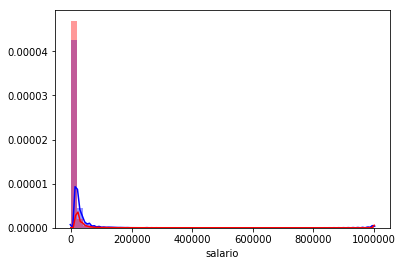

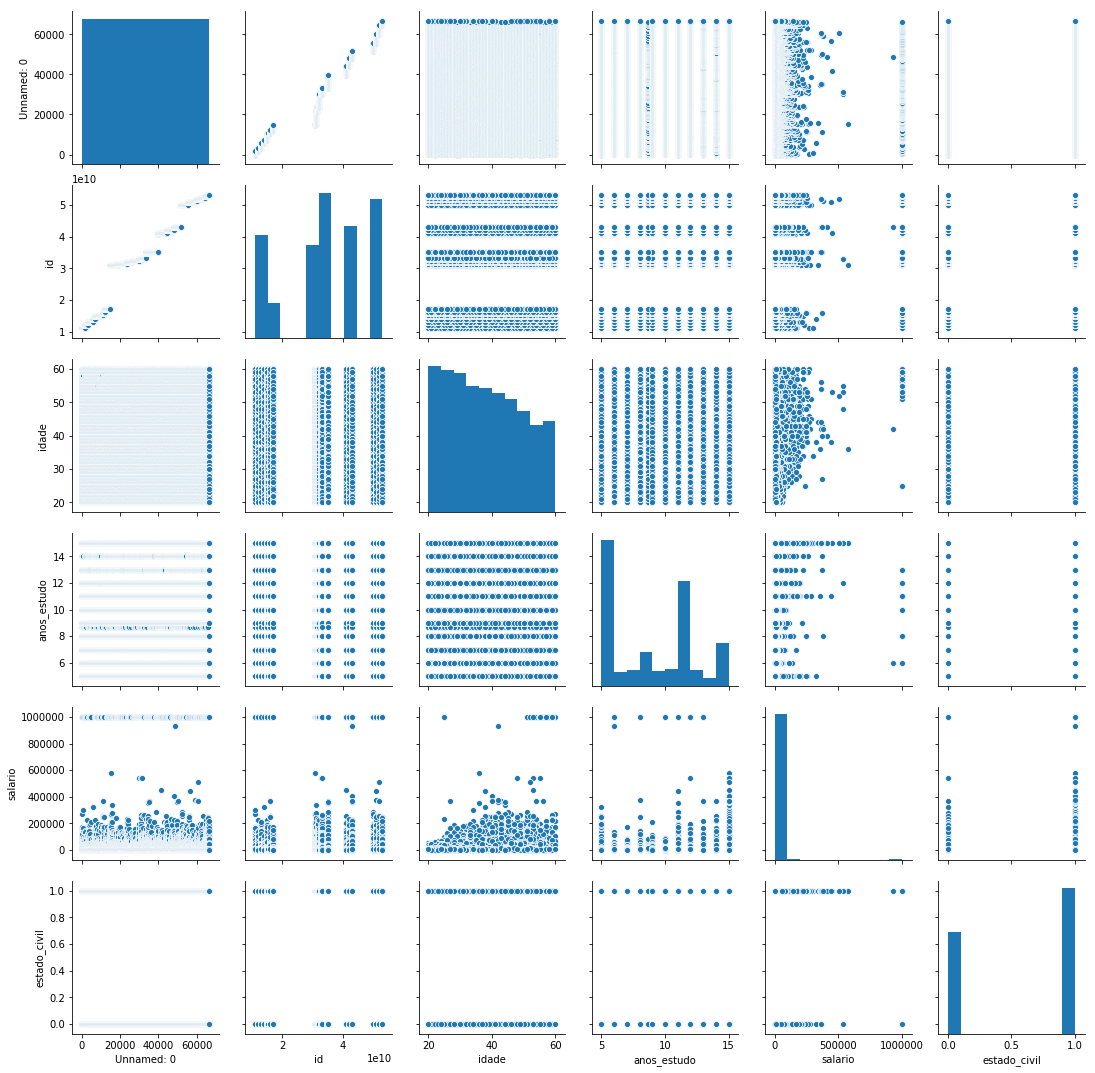

In [156]:
# Gráfico demora um pouco pra rodar
sns.distplot( df_homens["salario"] , color="blue", label="Salario Homens")
sns.distplot( df_mulheres["salario"] , color="red", label="Salario Mulheres")
sns.pairplot(df)

Isto significa que na média os homens ganham mais, porém a diferença entre o salário mínimo e o máximo (mediana) para ambos é estatisticamente igual, e o salário mais frequente (moda) para ambos também é o mesmo.

In [9]:
### fazer uma contagem para cada categoria usando dicionario (Comentário Marcos)

# Visualização da distribuição dos dados (mundo real)

### Distribuição da variável idade

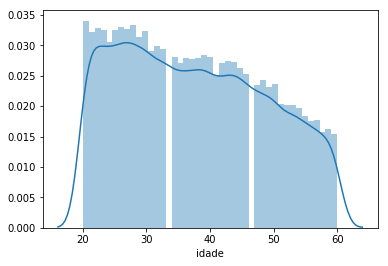

In [48]:
import seaborn as sns
sns.distplot(df['idade'])

### Distribuição da variável anos de estudo

#### Preenchendo os valores nulos com a mediana para poder plotar a distribuição

In [52]:
df['anos_estudo'].fillna((df['anos_estudo'].median()), inplace=True)

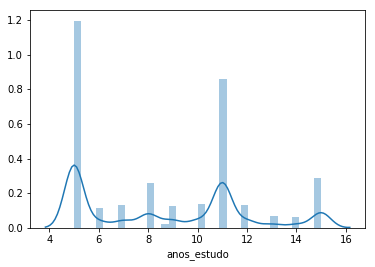

In [53]:
sns.distplot(df['anos_estudo'])

In [56]:
df['salario'].fillna((df['salario'].median()), inplace=True)

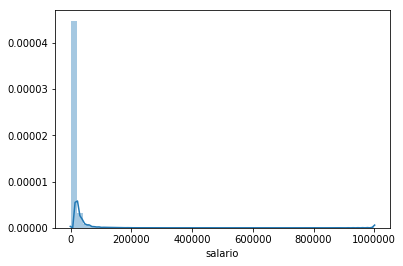

In [57]:
sns.distplot(df['salario'])

In [69]:
print ('Assimetria do Salário =', "%.4f"% df['salario'].skew())
print ('Assimetria da idade =', "%.4f"% df['idade'].skew())
print ('Assimetria dos anos de estudo =', "%.4f"% df['anos_estudo'].skew())

Assimetria do Salário = 12.3789
Assimetria da idade = 0.2200
Assimetria dos anos de estudo = 0.3156


# Exemplo de curva de distribuição assimétrica 

Não é necessário preocupar-se com o código, mas sim com o conceito.

[Text(0,0.5,'Frequency'), Text(0.5,0,'Gamma Distribution')]

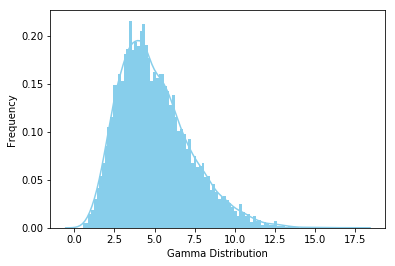

In [79]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,kde=True,bins=100,color='skyblue',hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

# Teorema do Limite Central

<br>
<img src="img/teorema_limite_central.png">
<br>

*fonte: Wikipedia

O Teorema do limite central é um importante resultado da estatística e a demonstração de muitos outros teoremas estatísticos dependem dele. Em teoria das probabilidades, esse teorema afirma que quando o tamanho da amostra aumenta, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal. Este resultado é fundamental na teoria da inferência estatística.

Na inferência estatística a utilidade do teorema central do limite vai desde estimar os parâmetros como a média populacional ou o desvio padrão da média populacional, a partir de uma amostra aleatória dessa população, ou seja, da média amostral e do desvio padrão da média amostral até calcular a probabilidade de um parâmetro ocorrer dado um intervalo, sua média amostral e o desvio padrão da média amostral. 

## Demonstração do teorema do limite central com um dado não viciado

<br>
<img src="img/dado.png">
<br>

O programa representa o total da rolagem de dois dados 100 vezes e exibe o total acumulado em um histograma.
Quando você chama roll_hundred_pair, ele exibe o total das possibilidades dentro do intervalo de 100 vezes. Há a rolagem 1 e a rolagem 2, onde cada um escolherá um número inteiro aleatório por meio de 1-6. Então o total do rolo 1 será adicionado ao rolo 2 e você obterá o total. Isto irá repetir uma centena de vezes e depois produzir um histograma, imprimindo o total.



Podemos fazer o teorema do limite central de concreto com um exemplo envolvendo o rolamento de dados.

Lembre-se que um dado é um cubo com um número diferente em cada lado de 1 a 6. Cada número tem uma probabilidade de 1 em 6 para aparecer em um lançamento. A distribuição dos números que aparecem a partir de um dado é uniforme, dada a igual probabilidade.

Podemos usar a função randint( ) NumPy para gerar um número específico de rolos de dados aleatórios (por exemplo, 100) entre 1 e 6.

A execução do exemplo gera e imprime a amostra de 100 rolagens de dois dados e os valores da amostra com a sua distribuição em um histograma

Sabemos que o valor médio da distribuição é 7 calculado como (2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12) / 12 ou 77/11 = 7.

Podemos ver que a média da amostra está um pouco errada, o que é esperado porque é uma estimativa da média populacional.

Podemos então repetir este processo várias vezes, como 1.000. Isso nos dará um resultado de 1.000 observações na amostra. De acordo com o teorema do limite central, a distribuição dessas médias amostrais será Normal ou Gaussiana.

O exemplo abaixo realiza este experimento e plota a distribuição resultante de médias amostrais.

Para uma ferramente interativa online [clique aqui](https://www.openprocessing.org/sketch/124236/)

In [136]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.ion()

def roll_pair():
    total = []
    
    for choice in range(100):
        roll1 = random.randint(1,6)
        roll2 = random.randint(1,6)
        total += [(roll1+roll2)]
        
    print (total)
    
    plt.hist(total)
    plt.show()

[6, 6, 9, 9, 7, 9, 4, 6, 3, 4, 9, 6, 8, 9, 6, 9, 3, 11, 9, 10, 5, 6, 8, 5, 6, 10, 6, 9, 7, 6, 5, 7, 4, 7, 10, 4, 7, 9, 8, 5, 10, 7, 4, 3, 10, 5, 8, 11, 12, 12, 8, 11, 7, 8, 4, 9, 5, 10, 3, 5, 5, 8, 2, 8, 8, 8, 11, 7, 8, 9, 5, 2, 7, 6, 7, 5, 10, 7, 9, 5, 7, 8, 11, 6, 8, 10, 7, 4, 9, 11, 9, 8, 8, 7, 5, 9, 8, 5, 8, 10]


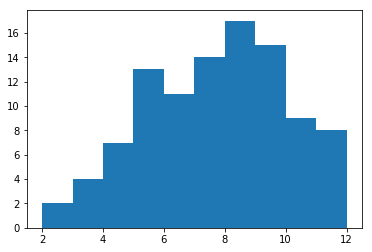

In [137]:
roll_pair()